# Exploratory Data Analysis

In [ ]:
!pip install kagglehub[pandas-datasets] --quiet

In [ ]:
# Install dependencies as needed:
import kagglehub
from kagglehub import KaggleDatasetAdapter

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from wordcloud import WordCloud
from collections import Counter

In [ ]:
file_path = "dataset-tickets-multi-lang-4-20k.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "tobiasbueck/multilingual-customer-support-tickets",
  file_path,
)

<ipython-input-5-3398c303bdef>:4: DeprecationWarning: load_dataset is deprecated and will be removed in future version.
  df = kagglehub.load_dataset(


100%|██████████| 17.9M/17.9M [00:00<00:00, 103MB/s] 


In [ ]:
# Checking data types of the variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   subject   18539 non-null  object
 1   body      19998 non-null  object
 2   answer    19996 non-null  object
 3   type      20000 non-null  object
 4   queue     20000 non-null  object
 5   priority  20000 non-null  object
 6   language  20000 non-null  object
 7   tag_1     20000 non-null  object
 8   tag_2     19954 non-null  object
 9   tag_3     19905 non-null  object
 10  tag_4     18461 non-null  object
 11  tag_5     13091 non-null  object
 12  tag_6     7351 non-null   object
 13  tag_7     3928 non-null   object
 14  tag_8     1907 non-null   object
dtypes: object(15)
memory usage: 2.3+ MB


## Filtering by English Tickets

In [ ]:
df = df[df['language'] == 'en']

df.head()

,subject,body,answer,type,queue,priority,language,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7,tag_8
1,Customer Support Inquiry,Seeking information on digital strategies that...,We offer a variety of digital strategies and s...,Request,Customer Service,medium,en,Feedback,Sales,IT,Tech Support,NaN,NaN,NaN,NaN
2,Data Analytics for Investment,I am contacting you to request information on ...,I am here to assist you with data analytics to...,Request,Customer Service,medium,en,Technical,Product,Guidance,Documentation,Performance,Feature,NaN,NaN
4,Security,"Dear Customer Support, I am reaching out to in...","Dear [name], we take the security of medical d...",Request,Customer Service,medium,en,Security,Customer,Compliance,Breach,Documentation,Guidance,NaN,NaN
5,Concerns About Securing Medical Data on 2-in-1...,Inquiring about best practices for securing me...,Thank you for your concern regarding securing ...,Request,Technical Support,medium,en,Security,Product,Feature,IT,Tech Support,NaN,NaN,NaN
7,Problem with Integration,"The integration stopped working unexpectedly, ...",I will look into the problem and call you at <...,Problem,IT Support,high,en,Technical,Integration,Bug,Resolution,Outage,Documentation,NaN,NaN


## Dropping Extra Metadata Columns

In [ ]:
misc_metadata = ['tag_4', 'tag_5', 'tag_6', 'tag_7', 'tag_8']

df = df.drop(misc_metadata, axis=1)

df.head()

,subject,body,answer,type,queue,priority,language,tag_1,tag_2,tag_3
1,Customer Support Inquiry,Seeking information on digital strategies that...,We offer a variety of digital strategies and s...,Request,Customer Service,medium,en,Feedback,Sales,IT
2,Data Analytics for Investment,I am contacting you to request information on ...,I am here to assist you with data analytics to...,Request,Customer Service,medium,en,Technical,Product,Guidance
4,Security,"Dear Customer Support, I am reaching out to in...","Dear [name], we take the security of medical d...",Request,Customer Service,medium,en,Security,Customer,Compliance
5,Concerns About Securing Medical Data on 2-in-1...,Inquiring about best practices for securing me...,Thank you for your concern regarding securing ...,Request,Technical Support,medium,en,Security,Product,Feature
7,Problem with Integration,"The integration stopped working unexpectedly, ...",I will look into the problem and call you at <...,Problem,IT Support,high,en,Technical,Integration,Bug


In [ ]:
# Shape of the dataframe
print('Shape:', df.shape)

Shape: (11923, 10)


## Descriptive Statistics

In [ ]:
# Omitting text columns
df_categories = df[['type','queue','priority','tag_1','tag_2','tag_3']]

df_categories.describe()

,type,queue,priority,tag_1,tag_2,tag_3
count,11923,11923,11923,11923,11913,11879
unique,4,10,3,87,176,297
top,Incident,Technical Support,medium,Technical,Performance,IT
freq,4642,3412,4952,3057,1649,1998


## Checking for Imbalance

In [ ]:
for col in df_categories:
  print(df_categories[col].value_counts())
  print('------------------------------------------------------------')

type
Incident    4642
Request     3498
Problem     2498
Change      1285
Name: count, dtype: int64
------------------------------------------------------------
queue
Technical Support                  3412
Product Support                    2232
Customer Service                   1859
IT Support                         1391
Billing and Payments               1302
Returns and Exchanges               582
Service Outages and Maintenance     442
Sales and Pre-Sales                 330
Human Resources                     205
General Inquiry                     168
Name: count, dtype: int64
------------------------------------------------------------
priority
medium    4952
high      4571
low       2400
Name: count, dtype: int64
------------------------------------------------------------
tag_1
Technical             3057
Security              2033
Bug                   1253
Feedback              1120
Feature                867
                      ... 
Lead                     1
Critical Da

## Visualizations

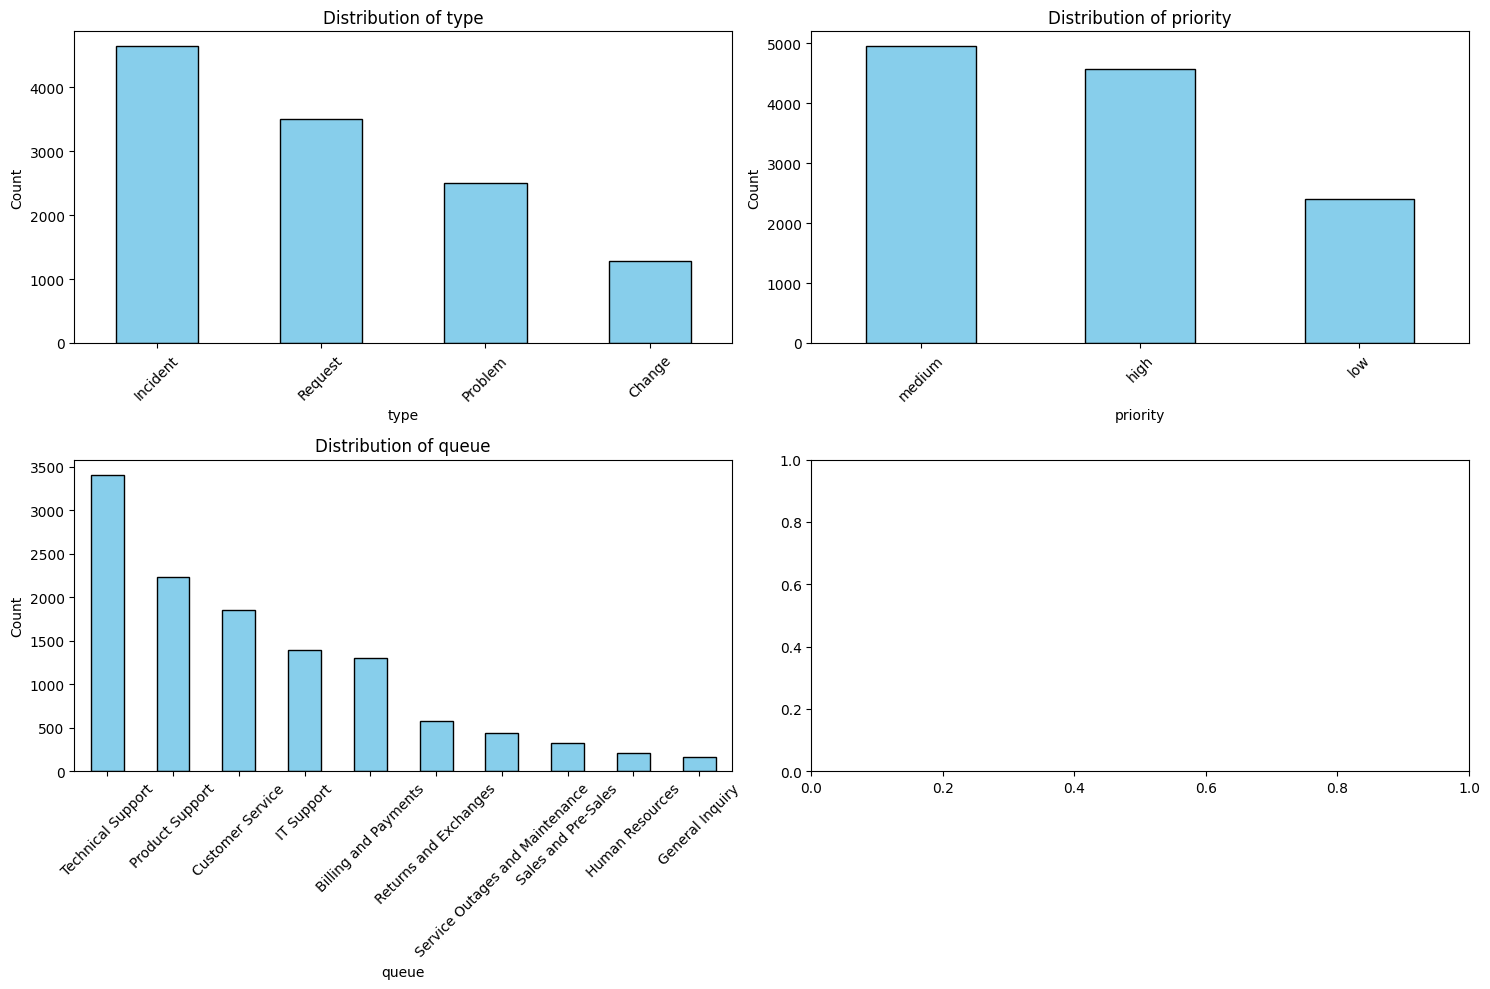

In [ ]:
plot_categories = df[['type','priority','queue']]

# Set up subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Flatten axes array for easy iteration
axes = axes.flatten()

# Iterate through each categorical column and plot value counts
for i, col in enumerate(plot_categories.columns):
    df_categories[col].value_counts().plot(kind='bar', ax=axes[i], color='skyblue', edgecolor='black')
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_ylabel('Count')
    axes[i].set_xlabel(col)
    axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

# Adjust layout to prevent overlapping
plt.tight_layout()
plt.show()

### Body and Answer Character Lengths

In [ ]:
# Create distribution chart of character length for body

# Calculate character lengths
df["body_length"] = df["body"].str.len()
df["answer_length"] = df["answer"].str.len()
df["combined_length"] = df["body_length"] + df["answer_length"]

#### Individual Body and Answer Lengths

Minimum Length: 4.0
Maximum Length: 1793.0


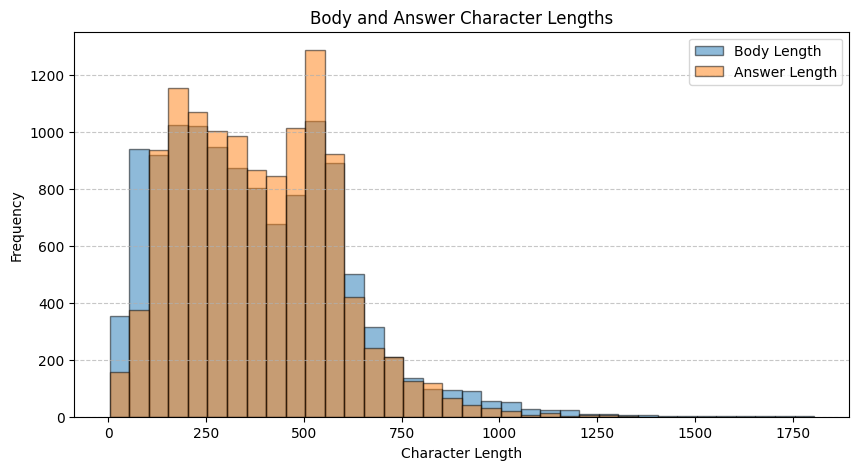

In [ ]:
# Define bin width
bin_width = 50
min_length = min(df["body_length"].min(), df["answer_length"].min())
max_length = max(df["body_length"].max(), df["answer_length"].max())

print(f"Minimum Length: {min_length}")
print(f"Maximum Length: {max_length}")

# Create bins with fixed width
bins = np.arange(min_length, max_length + bin_width, bin_width)

# Plot histogram
plt.figure(figsize=(10,5))
plt.hist(df["body_length"], bins=bins, alpha=0.5, label="Body Length", edgecolor='black')
plt.hist(df["answer_length"], bins=bins, alpha=0.5, label="Answer Length", edgecolor='black')
plt.xlabel("Character Length")
plt.ylabel("Frequency")
plt.title("Body and Answer Character Lengths")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()


Full Text(Subject + Body) Length Statistics:
count    11923.000000
mean        62.809612
std         36.439271
min          2.000000
25%         34.000000
50%         58.000000
75%         87.000000
max        276.000000
Name: text_length, dtype: float64


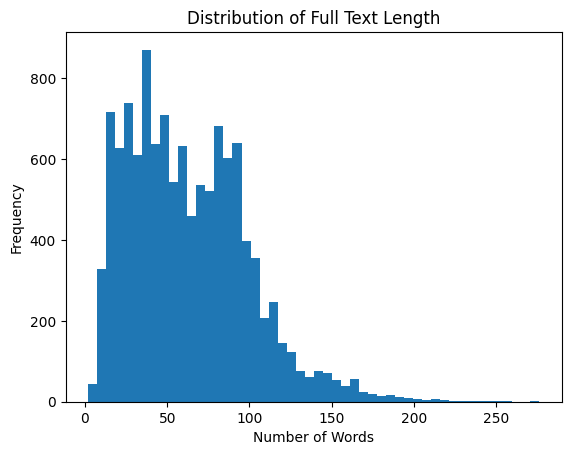

<Figure size 640x480 with 0 Axes>

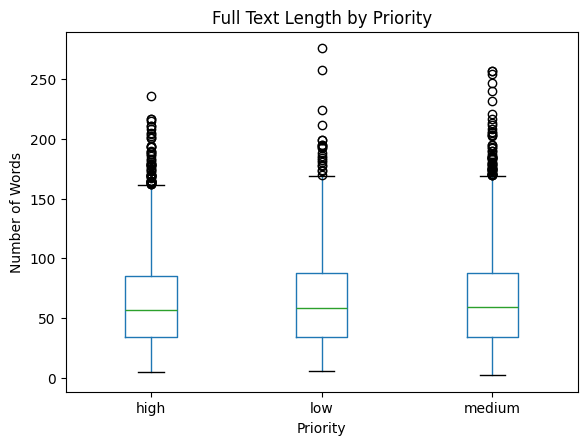

<Figure size 640x480 with 0 Axes>

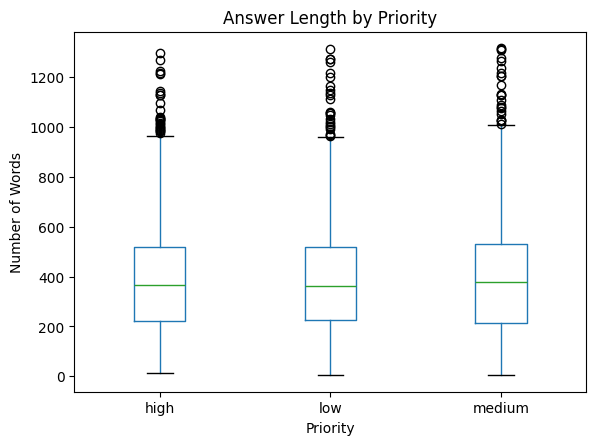

In [ ]:
df['full_text'] = df['subject'].astype(str) + " " + df['body'].astype(str)

df['text_length'] = df['full_text'].apply(lambda x: len(str(x).split()))
print("\nFull Text(Subject + Body) Length Statistics:")
print(df['text_length'].describe())

plt.figure()
plt.hist(df['text_length'], bins=50)
plt.title("Distribution of Full Text Length")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()

plt.figure()
df.boxplot(column='text_length', by='priority', grid=False)
plt.title("Full Text Length by Priority")
plt.suptitle("")
plt.xlabel("Priority")
plt.ylabel("Number of Words")
plt.show()

plt.figure()
df.boxplot(column='answer_length', by='priority', grid=False)
plt.title("Answer Length by Priority")
plt.suptitle("")
plt.xlabel("Priority")
plt.ylabel("Number of Words")
plt.show()

#### Combined Body + Answer Lengths

Minimum Length: 44.0
Maximum Length: 2510.0


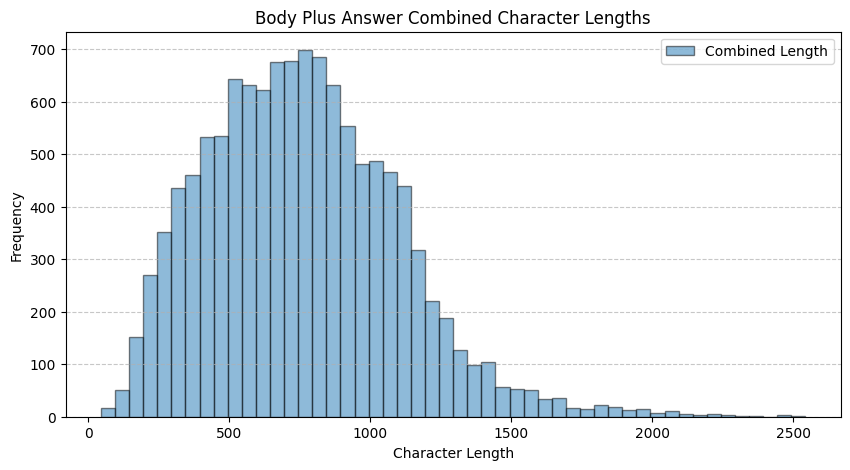

In [ ]:
# Define bin width
bin_width = 50
min_length = df["combined_length"].min()
max_length = df["combined_length"].max()

print(f"Minimum Length: {min_length}")
print(f"Maximum Length: {max_length}")

# Create bins with fixed width
bins = np.arange(min_length, max_length + bin_width, bin_width)

# Plot histogram
plt.figure(figsize=(10,5))
plt.hist(df["combined_length"], bins=bins, alpha=0.5, label="Combined Length", edgecolor='black')
plt.xlabel("Character Length")
plt.ylabel("Frequency")
plt.title("Body Plus Answer Combined Character Lengths")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

## Missing Values & Duplicates Analysis

In [ ]:
# Check for missing values in each column
print("\nMissing Values by Column:")
print(df.isnull().sum())

# Check for duplicates based on a subset of columns
duplicate_rows = df.duplicated(subset=["subject", "body", "priority"])
print(f"\nNumber of duplicate records: {duplicate_rows.sum()}")


Missing Values by Column:
subject            1032
body                  1
answer                3
type                  0
queue                 0
priority              0
language              0
tag_1                 0
tag_2                10
tag_3                44
body_length           1
answer_length         3
combined_length       4
full_text             0
text_length           0
dtype: int64

Number of duplicate records: 0


## CROSS-TABULATION (Priority vs. Queue)


Priority vs. Queue Cross-Tab:
queue     Billing and Payments  Customer Service  General Inquiry  \
priority                                                            
high                       363               337               28   
low                        273               566              110   
medium                     666               956               30   

queue     Human Resources  IT Support  Product Support  Returns and Exchanges  \
priority                                                                        
high                   23         642              701                    130   
low                    92         151              413                    204   
medium                 90         598             1118                    248   

queue     Sales and Pre-Sales  Service Outages and Maintenance  \
priority                                                         
high                       62                              309   
low                

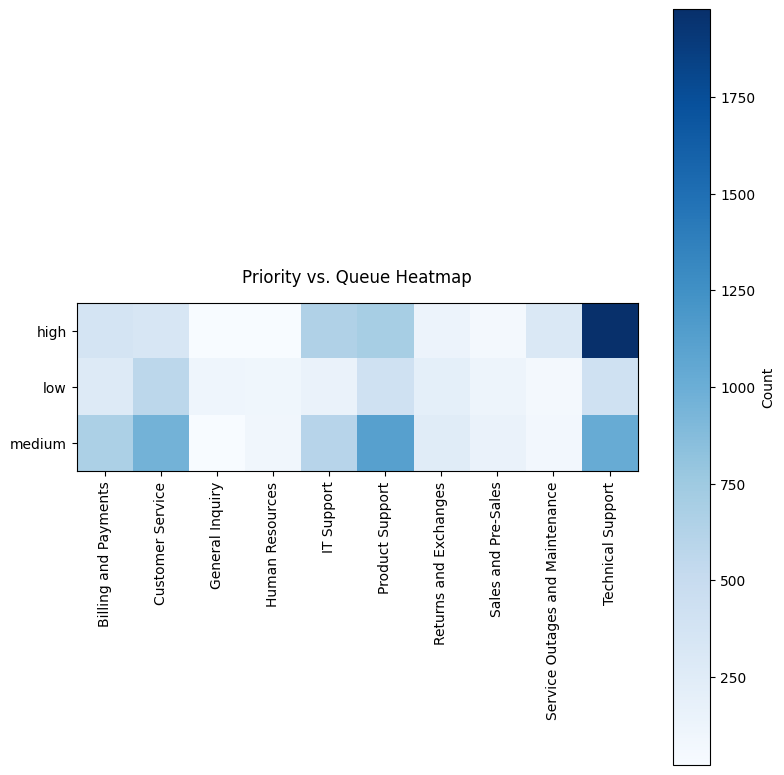

In [ ]:
import matplotlib.pyplot as plt

if 'queue' in df.columns:
    priority_vs_queue = pd.crosstab(df['priority'], df['queue'])
    print("\nPriority vs. Queue Cross-Tab:")
    print(priority_vs_queue)

    # Create a square figure (e.g., 8x8)
    fig, ax = plt.subplots(figsize=(8, 8))

    # Display as an image with equal aspect ratio
    im = ax.imshow(priority_vs_queue, cmap='Blues', aspect='equal')

    # Add colorbar
    cbar = fig.colorbar(im, ax=ax)
    cbar.set_label("Count", rotation=90)

    # Set title
    ax.set_title("Priority vs. Queue Heatmap", pad=15)

    # Set tick labels
    ax.set_xticks(range(len(priority_vs_queue.columns)))
    ax.set_xticklabels(priority_vs_queue.columns, rotation=90)
    ax.set_yticks(range(len(priority_vs_queue.index)))
    ax.set_yticklabels(priority_vs_queue.index)

    # Adjust layout to avoid label cutoff
    plt.tight_layout()
    plt.show()



Priority vs. Type Cross-Tab:
type      Change  Incident  Problem  Request
priority                                    
high         476      2022      869     1204
low          268       836      538      758
medium       541      1784     1091     1536


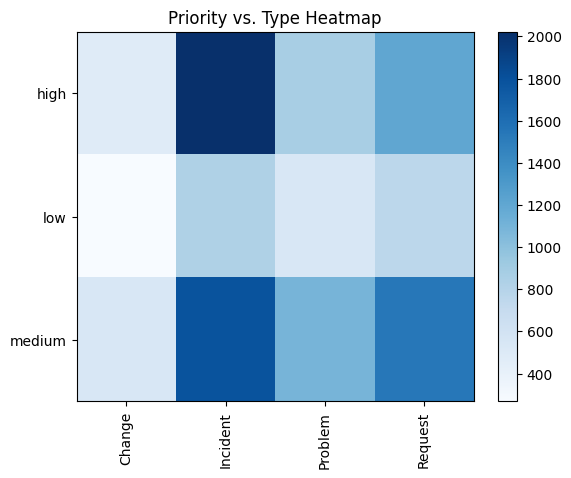

In [ ]:
if 'type' in df.columns:
    priority_vs_queue = pd.crosstab(df['priority'], df['type'])
    print("\nPriority vs. Type Cross-Tab:")
    print(priority_vs_queue)

    plt.figure()
    plt.imshow(priority_vs_queue, cmap='Blues', aspect='auto')
    plt.colorbar()
    plt.title("Priority vs. Type Heatmap")
    plt.xticks(ticks=range(len(priority_vs_queue.columns)), labels=priority_vs_queue.columns, rotation=90)
    plt.yticks(ticks=range(len(priority_vs_queue.index)), labels=priority_vs_queue.index)
    plt.show()

## Word Frequency and Word Cloud

In [ ]:
import re
import nltk

nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



Top 50 Most Common Words (cleaned):
[('information', 4455), ('assistance', 4450), ('software', 4085), ('analytics', 3881), ('security', 3717), ('investment', 3572), ('tools', 3061), ('digital', 3033), ('system', 2873), ('details', 2386), ('strategies', 2134), ('marketing', 2101), ('access', 1945), ('request', 1941), ('response', 1844), ('recent', 1826), ('resolve', 1806), ('guidance', 1730), ('brand', 1728), ('updates', 1657), ('restarting', 1598), ('update', 1563), ('systems', 1550), ('saas', 1534), ('services', 1484), ('enhance', 1406), ('offer', 1400), ('solution', 1364), ('breach', 1349), ('encryption', 1347), ('additional', 1341), ('team', 1334), ('steps', 1298), ('address', 1277), ('growth', 1274), ('platform', 1211), ('inform', 1208), ('optimization', 1198), ('server', 1177), ('performance', 1156), ('outdated', 1144), ('settings', 1122), ('problems', 1118), ('already', 1105), ('measures', 1068), ('report', 1054), ('require', 1054), ('potential', 1034), ('nan', 1033), ('like', 1

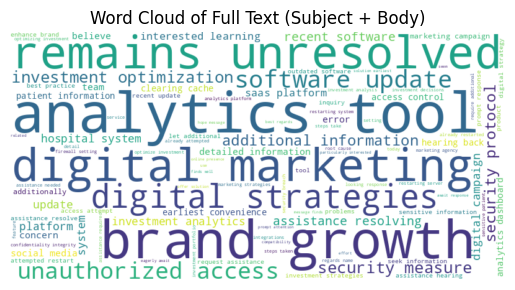

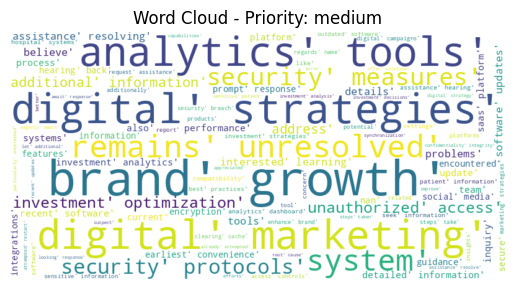

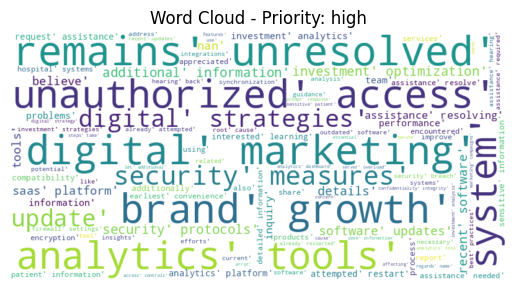

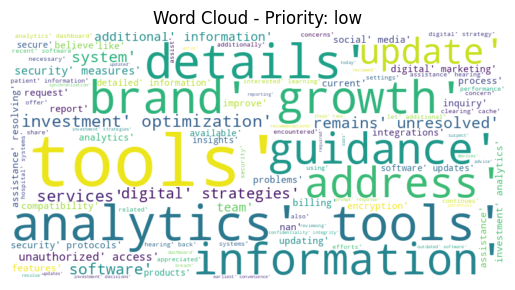

In [ ]:
custom_stopwords = {
    "issue", "issues", "problem", "please", "thank", "could", "would",
    "support", "help", "need", "us", "look", "forward", "appreciate", "soon", "time", "know", "still",
    "despite", "hello", "might","due", "greatly", "customer", "provide", "contacting", "possible",
    "dear", "may", "kindly", "matter","medical","data","integration","project","management"
}

stop_words = set(stopwords.words('english'))
stop_words = stop_words.union(custom_stopwords)

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]
    return tokens

df['clean_tokens'] = df['full_text'].astype(str).apply(clean_text)

# Flatten all tokens into a single list
all_tokens = [token for tokens in df['clean_tokens'] for token in tokens]

# Frequency counts (Counter from collections)
from collections import Counter
word_counts = Counter(all_tokens)

# 50 most common words
print("\nTop 50 Most Common Words (cleaned):")
print(word_counts.most_common(50))

# WordCloud
cleaned_text = " ".join(all_tokens)

wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    max_words=100
).generate(cleaned_text)

plt.figure()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Full Text (Subject + Body)")
plt.show()


for priority_level in df['priority'].unique():
    subset_text = " ".join(df.loc[df['priority'] == priority_level, 'clean_tokens'].astype(str))
    if subset_text.strip():
        wc = WordCloud(width=800, height=400, background_color='white', max_words=100)
        wc.generate(subset_text)

        plt.figure()
        plt.imshow(wc, interpolation='bilinear')
        plt.axis("off")
        plt.title(f"Word Cloud - Priority: {priority_level}")
        plt.show()


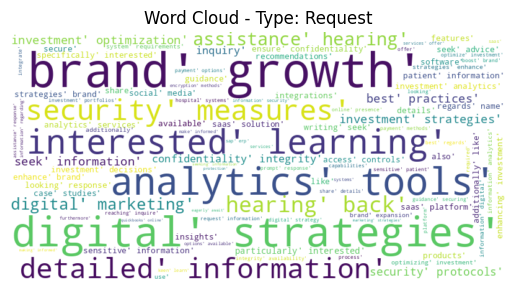

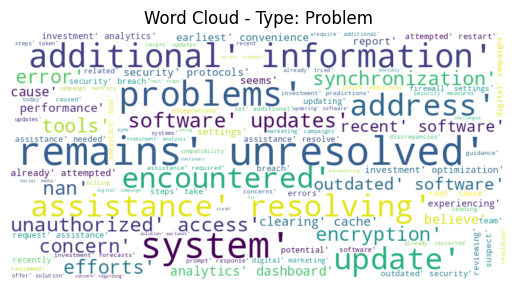

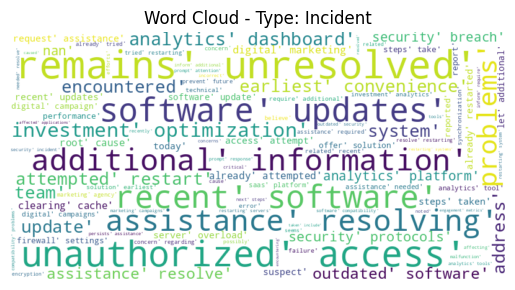

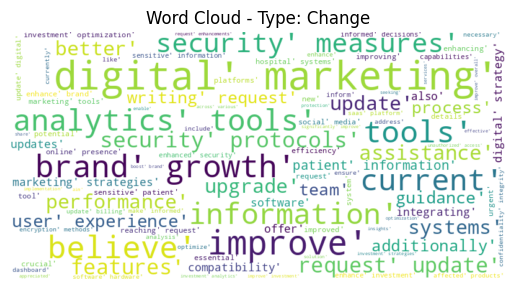

In [ ]:
for tag_category in df['type'].unique():
    subset_text = " ".join(df.loc[df['type'] == tag_category, 'clean_tokens'].astype(str))
    if subset_text.strip():
        wc = WordCloud(width=800, height=400, background_color='white', max_words=100)
        wc.generate(subset_text)

        plt.figure()
        plt.imshow(wc, interpolation='bilinear')
        plt.axis("off")
        plt.title(f"Word Cloud - Type: {tag_category}")
        plt.show()


Top 20 Bigrams:
('medical', 'data') -> 3186
('data', 'analytics') -> 2601
('project', 'management') -> 1915
('brand', 'growth') -> 986
('analytics', 'tools') -> 891
('data', 'breach') -> 850
('remains', 'unresolved') -> 840
('digital', 'marketing') -> 831
('digital', 'strategies') -> 802
('unauthorized', 'access') -> 742
('investment', 'optimization') -> 735
('security', 'measures') -> 732
('security', 'protocols') -> 698
('additional', 'information') -> 647
('management', 'saas') -> 549
('software', 'updates') -> 536
('assistance', 'resolving') -> 517
('recent', 'software') -> 499
('data', 'encryption') -> 494
('securing', 'medical') -> 483

Top 20 Trigrams:
('data', 'analytics', 'tools') -> 654
('project', 'management', 'saas') -> 549
('securing', 'medical', 'data') -> 473
('recent', 'software', 'updates') -> 342
('saas', 'project', 'management') -> 337
('project', 'management', 'software') -> 226
('hope', 'message', 'finds') -> 221
('message', 'finds', 'well') -> 221
('sensitive', 

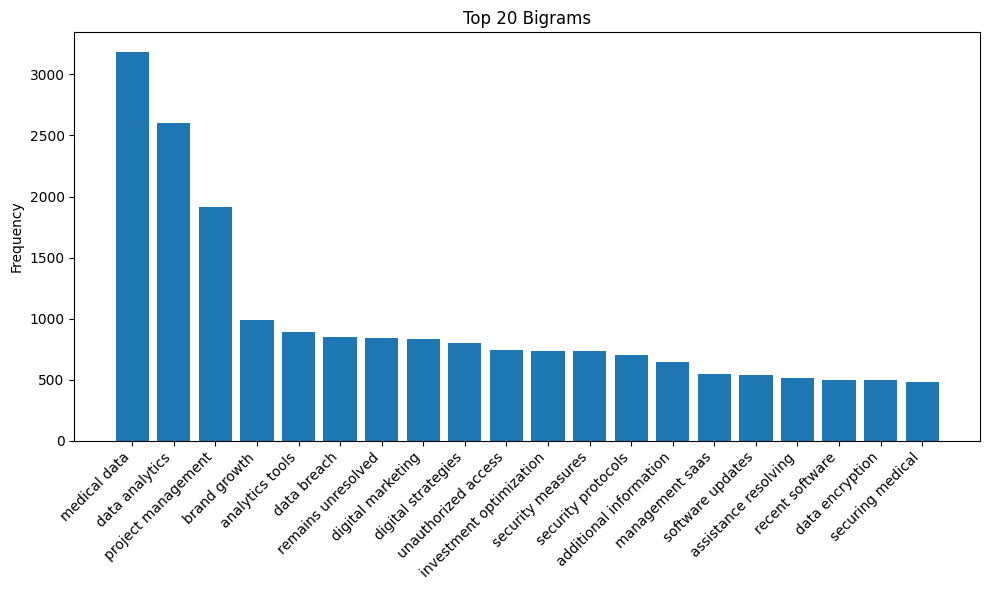

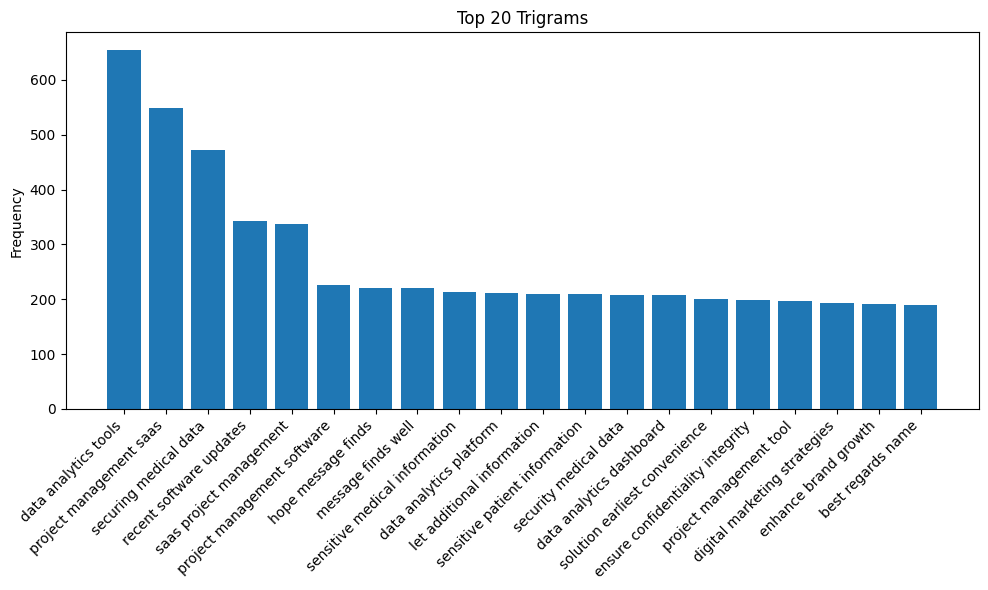

In [ ]:
from nltk import ngrams

def get_ngram_frequency(tokens_list_series, n=2, top_k=20):

    all_ngrams = []

    for tokens in tokens_list_series:
        # Generate n-grams for the current list of tokens
        ng_list = list(ngrams(tokens, n))
        all_ngrams.extend(ng_list)

    # Count frequencies of each n-gram
    ngram_counts = Counter(all_ngrams)

    # Return the top_k most common n-grams
    return ngram_counts.most_common(top_k)

# 1) Example for bigrams
bigram_counts = get_ngram_frequency(df['clean_tokens'], n=2, top_k=20)
print("\nTop 20 Bigrams:")
for bg, freq in bigram_counts:
    print(f"{bg} -> {freq}")

# 2) Example for trigrams
trigram_counts = get_ngram_frequency(df['clean_tokens'], n=3, top_k=20)
print("\nTop 20 Trigrams:")
for tg, freq in trigram_counts:
    print(f"{tg} -> {freq}")

# Optional: Visualize the top bigrams
def plot_ngram_bar_chart(ngram_counts, title="Top N-Grams"):
    ngrams_, freqs = zip(*ngram_counts)
    # Convert each tuple (e.g. ('login', 'error')) into a single string "login error"
    ngram_labels = [' '.join(ng) for ng in ngrams_]

    plt.figure(figsize=(10,6))
    plt.bar(ngram_labels, freqs)
    plt.xticks(rotation=45, ha='right')
    plt.title(title)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

# Plot top 20 bigrams
plot_ngram_bar_chart(bigram_counts, "Top 20 Bigrams")
# Plot top 20 trigrams
plot_ngram_bar_chart(trigram_counts, "Top 20 Trigrams")


## Tags Analysis


Tag Frequency (across all Tag columns):
Technical        3410
Performance      3137
Bug              3091
IT               2747
Security         2693
Feedback         2364
Feature          1648
Documentation    1472
Product          1271
Network           887
Tech Support      836
Outage            831
Customer          803
Billing           801
Sales             797
Integration       757
Crash             756
Disruption        581
Breach            559
Guidance          538
Name: count, dtype: int64


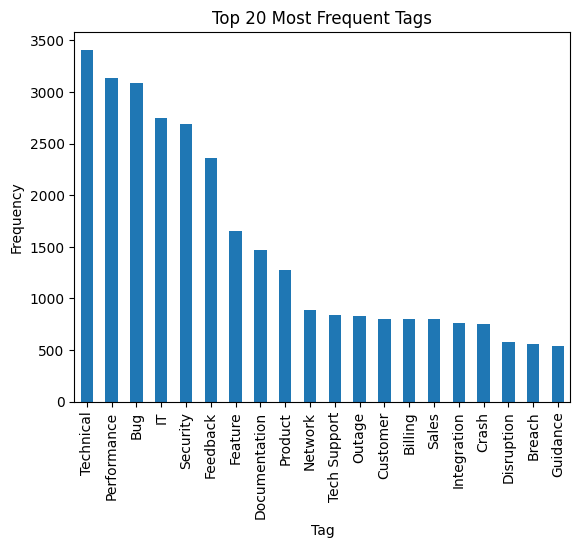

In [ ]:
if 'all_tags' in df.columns:
    df.drop(columns=['all_tags'], inplace=True)

tag_columns = [col for col in df.columns if "tag" in col]
if len(tag_columns) > 0:
    # Combine all tag columns into a single list per row
    df['all_tags'] = df[tag_columns].values.tolist()

    # Flatten the list of lists to compute overall tag frequency
    all_tags_flat = []
    for tags in df['all_tags']:
        # Remove None or NaN entries
        valid_tags = [t for t in tags if pd.notnull(t)]
        if len(valid_tags) > 0:
            all_tags_flat.extend(valid_tags)


    # Frequency counts of all tags
    tag_freq = pd.Series(all_tags_flat).value_counts()
    print("\nTag Frequency (across all Tag columns):")
    print(tag_freq.head(20))

    plt.figure()
    tag_freq.head(20).plot(kind='bar')
    plt.title("Top 20 Most Frequent Tags")
    plt.xlabel("Tag")
    plt.ylabel("Frequency")
    plt.show()

In [ ]:
from collections import Counter

all_tags_flat = [tag for tags_list in df['all_tags'] for tag in tags_list]
tag_counts = Counter(all_tags_flat)

In [ ]:
import itertools

# Get all unique tags
unique_tags = list(tag_counts.keys())

# Initialize a dictionary to count co-occurrences
co_occurrence_dict = {}

for tags_list in df['all_tags']:
    # Convert all tags to strings (and remove NaNs just in case)
    tags_list = [str(t) for t in tags_list if pd.notnull(t)]

    for tag_a, tag_b in itertools.combinations(tags_list, 2):
        pair = tuple(sorted([tag_a, tag_b]))
        co_occurrence_dict[pair] = co_occurrence_dict.get(pair, 0) + 1

# Convert to a DataFrame (optional) for easier viewing
co_occurrences = pd.DataFrame([
    {'Tag Pair': k, 'Co-Occurrences': v}
    for k,v in co_occurrence_dict.items()
]).sort_values(by='Co-Occurrences', ascending=False)

print("\nTop 20 Tag Pairs by Frequency:")
print(co_occurrences.head(20))



Top 20 Tag Pairs by Frequency:
                     Tag Pair  Co-Occurrences
28         (Bug, Performance)            1561
13           (Bug, Technical)            1260
30          (IT, Performance)            1005
68        (Feature, Feedback)             975
42             (IT, Security)             972
33         (IT, Tech Support)             698
0           (Feedback, Sales)             678
29                  (Bug, IT)             635
12   (Integration, Technical)             633
93   (Documentation, Feature)             624
39      (Security, Technical)             569
1              (Feedback, IT)             566
70     (Network, Performance)             557
36         (Breach, Security)             556
94  (Documentation, Feedback)             549
3        (Product, Technical)             547
77         (Billing, Payment)             507
69    (Feedback, Performance)             504
99        (Feedback, Product)             438
65   (Security, Tech Support)             411


In [ ]:
if 'priority' in df.columns:
    # For each row, we create a set of tags
    df['tags_set'] = df['all_tags'].apply(lambda x: set(x))

    # Flatten out:
    all_priorities = df['priority'].unique()

    # Prepare a frequency dictionary {tag: {priority: count}}
    tag_priority_count = {}
    for tag in unique_tags:
        tag_priority_count[tag] = {p: 0 for p in all_priorities}

    for _, row in df.iterrows():
        tags_in_row = row['tags_set']
        pri = row['priority']
        for t in tags_in_row:
            tag_priority_count[t][pri] += 1

    # Convert to DataFrame
    tag_priority_df = pd.DataFrame.from_dict(tag_priority_count, orient='index')
    print("\nSample of Tag vs. Priority Distribution:")
    display(tag_priority_df.head(20))



Sample of Tag vs. Priority Distribution:


,medium,high,low
Feedback,1036,759,569
Sales,355,248,194
IT,1122,1055,570
Technical,1465,1288,657
Product,575,411,285
Guidance,222,196,120
Security,1124,1071,498
Customer,377,255,171
Compliance,59,65,34
Feature,718,559,371


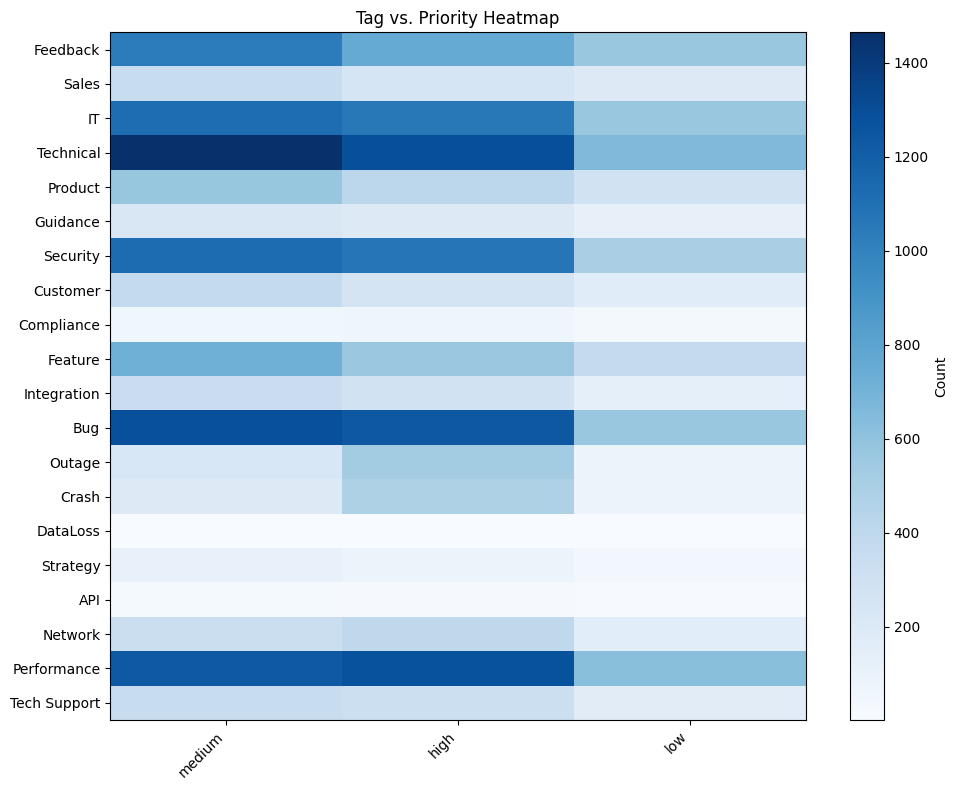

In [ ]:
sub_df = tag_priority_df.head(20)

heatmap_data_priority = sub_df.values

plt.figure(figsize=(10, 8))
plt.imshow(heatmap_data_priority, cmap='Blues', aspect='auto')
plt.colorbar(label="Count")

plt.title("Tag vs. Priority Heatmap")
plt.xticks(ticks=range(len(sub_df.columns)), labels=sub_df.columns, rotation=45, ha='right')
plt.yticks(ticks=range(len(sub_df.index)), labels=sub_df.index)

plt.tight_layout()
plt.show()

In [ ]:
if 'type' in df.columns:
    # For each row, we create a set of tags
    df['tags_set'] = df['all_tags'].apply(lambda x: set(x))

    # Flatten out
    all_types = df['type'].unique()

    # Prepare a frequency dictionary {tag: {type: count}}
    tag_type_count = {}
    for tag in unique_tags:
        tag_type_count[tag] = {p: 0 for p in all_types}

    for _, row in df.iterrows():
        tags_in_row = row['tags_set']
        typ = row['type']
        for t in tags_in_row:
            tag_type_count[t][typ] += 1

    # Convert to DataFrame
    tag_type_df = pd.DataFrame.from_dict(tag_type_count, orient='index')
    print("\nSample of Tag vs. Type Distribution:")
    display(tag_type_df.head(20))


Sample of Tag vs. Type Distribution:


,Request,Problem,Incident,Change
Feedback,1220,271,362,511
Sales,542,53,71,131
IT,854,571,1026,296
Technical,735,824,1511,340
Product,736,113,155,267
Guidance,375,24,35,104
Security,808,541,1037,307
Customer,407,116,199,81
Compliance,124,0,0,34
Feature,945,107,122,474


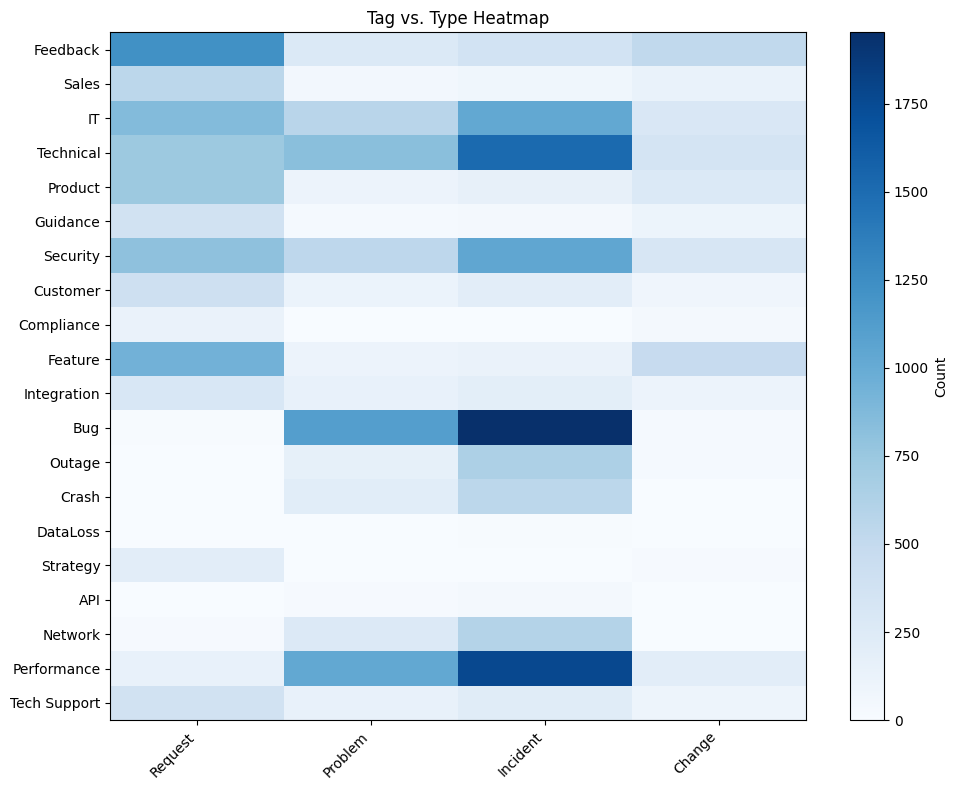

In [ ]:
sub_tag_df = tag_type_df.head(20)

heatmap_data = sub_tag_df.values

plt.figure(figsize=(10, 8))
plt.imshow(heatmap_data, cmap='Blues', aspect='auto')
plt.colorbar(label="Count")

plt.title("Tag vs. Type Heatmap")
plt.xticks(ticks=range(len(sub_tag_df.columns)), labels=sub_tag_df.columns, rotation=45, ha='right')
plt.yticks(ticks=range(len(sub_tag_df.index)), labels=sub_tag_df.index)

plt.tight_layout()
plt.show()